In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gdp
import descartes 
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
crs = {'init': 'epsg:4326'}
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [3]:
world_map = gdp.read_file('World_countries/World_Countries.shp')

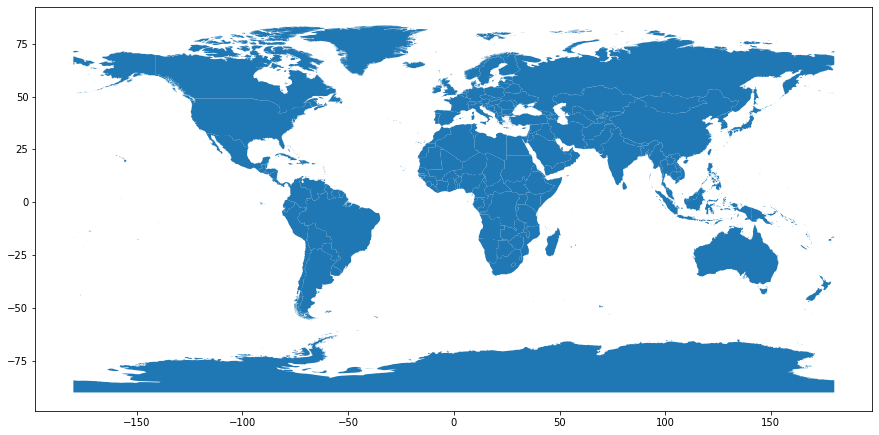

In [4]:
fig,ax = plt.subplots(figsize = (15,15))
world_map.plot(ax=ax)

In [5]:
geometry  = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
geometry[:3]

In [6]:
geo_df = gdp.GeoDataFrame(df, 
                        crs = crs,
                        geometry = geometry)
geo_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,geometry
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,POINT (17.87390 -11.20270)


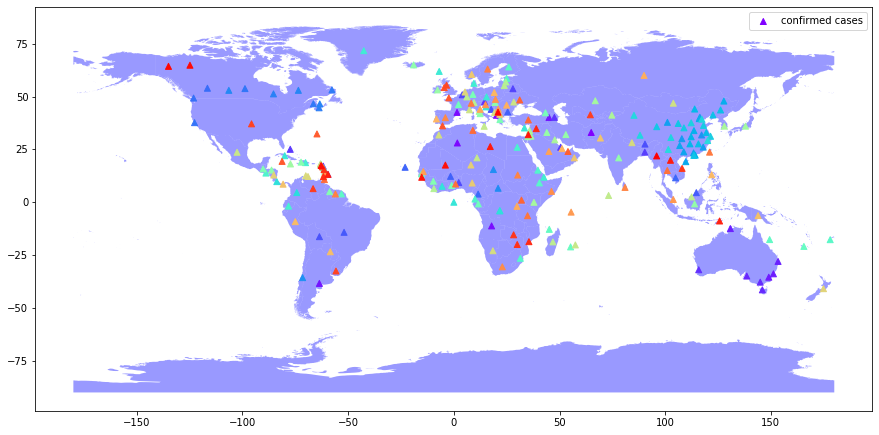

In [60]:
fig,ax = plt.subplots(figsize = (15,15))
world_map.plot(ax = ax, alpha = 0.4, color='blue')
geo_df[geo_df['3/27/20']>0].plot(ax=ax , marker="^", label="confirmed cases", cmap='rainbow')
plt.legend(prop={'size':10})

In [108]:
x0 = df.copy()
x0 = x0.iloc[:254, 2:4]
x0

,Lat,Long
0,33.0000,65.0000
1,41.1533,20.1683
2,28.0339,1.6596
3,42.5063,1.5218
4,-11.2027,17.8739
...,...,...
248,21.9162,95.9560
249,18.2206,-63.0686
250,18.4207,-64.6400
251,21.6940,-71.7979


In [135]:
kmeans = KMeans(5)
kmeans.fit(x0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [136]:
kmeans_predict = kmeans.fit_predict(x0)

In [137]:
x = x0.copy()
x['Clusters'] = kmeans_predict
x

,Lat,Long,Clusters
0,33.0000,65.0000,0
1,41.1533,20.1683,2
2,28.0339,1.6596,2
3,42.5063,1.5218,2
4,-11.2027,17.8739,3
...,...,...,...
248,21.9162,95.9560,0
249,18.2206,-63.0686,1
250,18.4207,-64.6400,1
251,21.6940,-71.7979,1


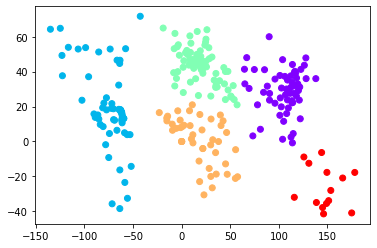

In [138]:
plt.scatter(x['Long'],x['Lat'], c=x['Clusters'] , cmap='rainbow')
plt.show()

In [139]:
geometry  = [Point(xy) for xy in zip(x['Long'], x['Lat'])]
geometry[:3]
geo_df1 = gdp.GeoDataFrame(x, 
                        crs = crs,
                        geometry = geometry)
geo_df1.head()

,Lat,Long,Clusters,geometry
0,33.0000,65.0000,0,POINT (65.00000 33.00000)
1,41.1533,20.1683,2,POINT (20.16830 41.15330)
2,28.0339,1.6596,2,POINT (1.65960 28.03390)
3,42.5063,1.5218,2,POINT (1.52180 42.50630)
4,-11.2027,17.8739,3,POINT (17.87390 -11.20270)


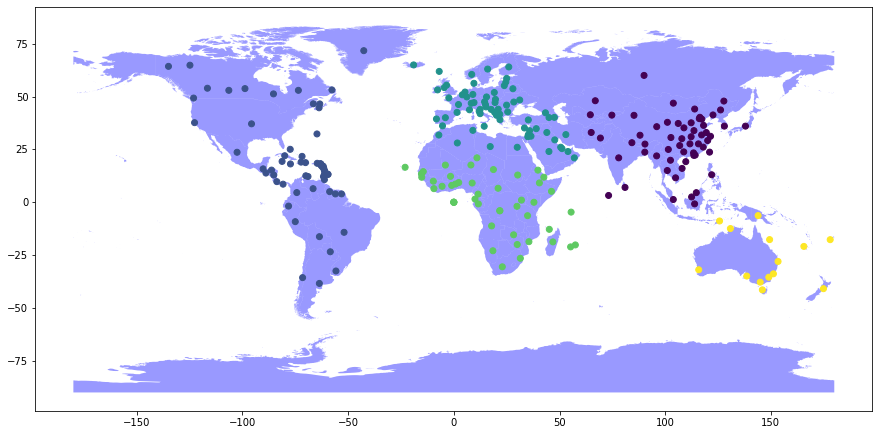

In [140]:
fig,ax = plt.subplots(figsize = (15,15))
world_map.plot(ax = ax, alpha = 0.4, color='blue')
geo_df1.plot(c=geo_df1['Clusters'],ax=ax)

In [141]:
kmeans.inertia_

148684.6289625325

In [117]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x0)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [118]:
wcss

[1438640.4184410772,
 589291.1520718478,
 253215.20307826664,
 199818.54715862637,
 148684.6289625325,
 121793.81406095764,
 95713.42327658301,
 79232.88888994392,
 68858.33821382356,
 60514.67112666354]

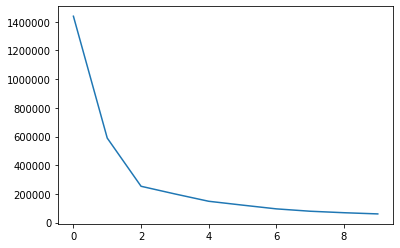

In [122]:
n_clusters = range(0,10)
plt.plot(n_clusters, wcss)